In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('mosquito_indicator.csv')
df

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...,...
1337,2019-12-27,5.5,0.0,-1.7,-4.6,2.6
1338,2019-12-28,5.5,0.0,1.1,-3.6,6.1
1339,2019-12-29,5.5,1.4,3.8,1.1,6.2
1340,2019-12-30,5.5,0.4,2.7,-5.7,6.8


In [54]:
new_df = df.loc[(df['rain(mm)'] > 25)]
new_df

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
14,2016-05-15,306.4,45.0,17.4,12.3,24.2
23,2016-05-24,614.4,38.5,16.8,15.4,21.8
52,2016-06-22,648.6,30.5,24.3,20.9,30.2
61,2016-07-01,518.3,108.5,24.0,22.0,26.6
64,2016-07-04,511.1,29.5,21.8,20.2,24.1
65,2016-07-05,525.7,100.5,23.1,20.2,24.8
76,2016-07-16,410.2,46.5,20.8,19.8,23.8
89,2016-07-29,372.9,59.5,26.3,23.4,28.4
176,2016-10-25,248.1,37.0,14.1,12.5,17.5


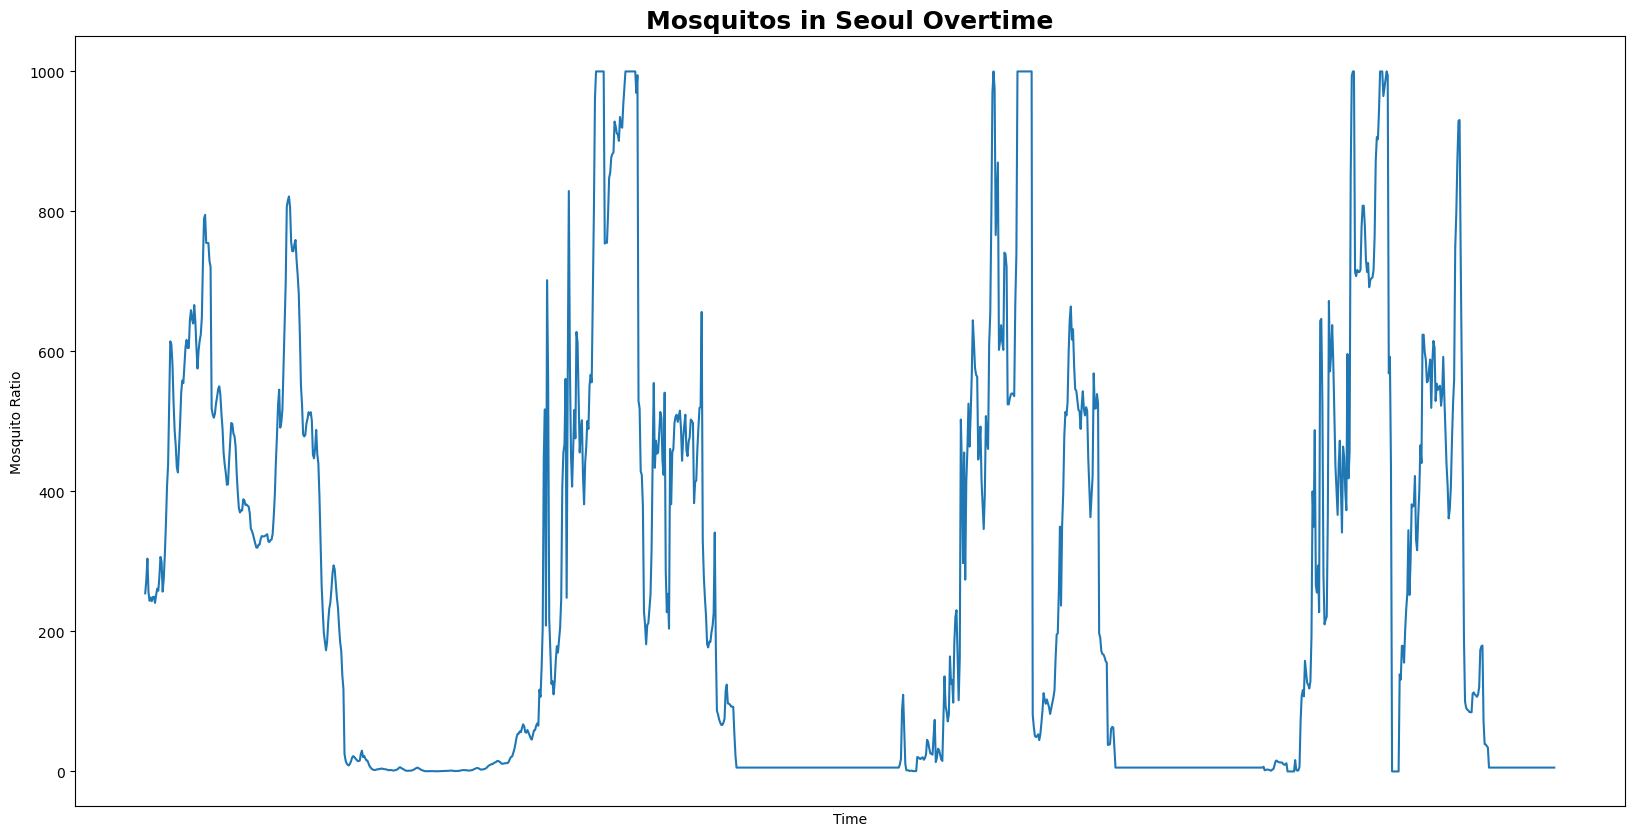

In [148]:
plt.figure(figsize=(20,10))
plt.title("Mosquitos in Seoul Overtime", fontdict={'fontweight':'bold','fontsize':18})

plt.plot(df['date'], df['mosquito_Indicator'], marker='none', label = 'mosquito_Indicator')
plt.xlabel('Time')
plt.ylabel('Mosquito Ratio')
plt.xticks([])


plt.show()

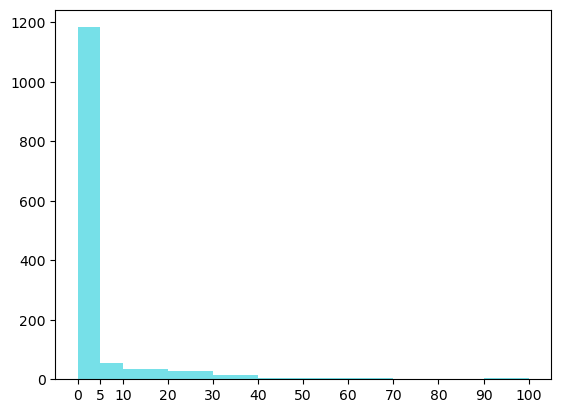

In [122]:
bins = [0,5,10,20,30,40,50,60,70,80,90,100]


plt.hist(df['rain(mm)'], bins=bins, color = '#76e0e8')

plt.xticks(bins)

plt.show()

In [164]:
import re

df.loc[df['date'].str.contains('-01-'), 'Month'] = 'January'
df.loc[df['date'].str.contains('-02-'), 'Month'] = 'February'
df.loc[df['date'].str.contains('-03-'), 'Month'] = 'March'
df.loc[df['date'].str.contains('-04-'), 'Month'] = 'April'
df.loc[df['date'].str.contains('-05-'), 'Month'] = 'May'
df.loc[df['date'].str.contains('-06-'), 'Month'] = 'June'
df.loc[df['date'].str.contains('-07-'), 'Month'] = 'July'
df.loc[df['date'].str.contains('-08-'), 'Month'] = 'August'
df.loc[df['date'].str.contains('-09-'), 'Month'] = 'September'
df.loc[df['date'].str.contains('-10-'), 'Month'] = 'October'
df.loc[df['date'].str.contains('-11-'), 'Month'] = 'November'
df.loc[df['date'].str.contains('-12-'), 'Month'] = 'December'
df

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃),Month
0,2016-05-01,254.4,0.0,18.8,12.2,26.0,May
1,2016-05-02,273.5,16.5,21.1,16.5,28.4,May
2,2016-05-03,304.0,27.0,12.9,8.9,17.6,May
3,2016-05-04,256.2,0.0,15.7,10.2,20.6,May
4,2016-05-05,243.8,7.5,18.9,10.2,26.9,May
...,...,...,...,...,...,...,...
1337,2019-12-27,5.5,0.0,-1.7,-4.6,2.6,December
1338,2019-12-28,5.5,0.0,1.1,-3.6,6.1,December
1339,2019-12-29,5.5,1.4,3.8,1.1,6.2,December
1340,2019-12-30,5.5,0.4,2.7,-5.7,6.8,December


In [165]:
month = df.loc[df['Month'] == "November"]
avg = month.loc[:, "mosquito_Indicator"].mean()
print(avg)

8.054368932038834


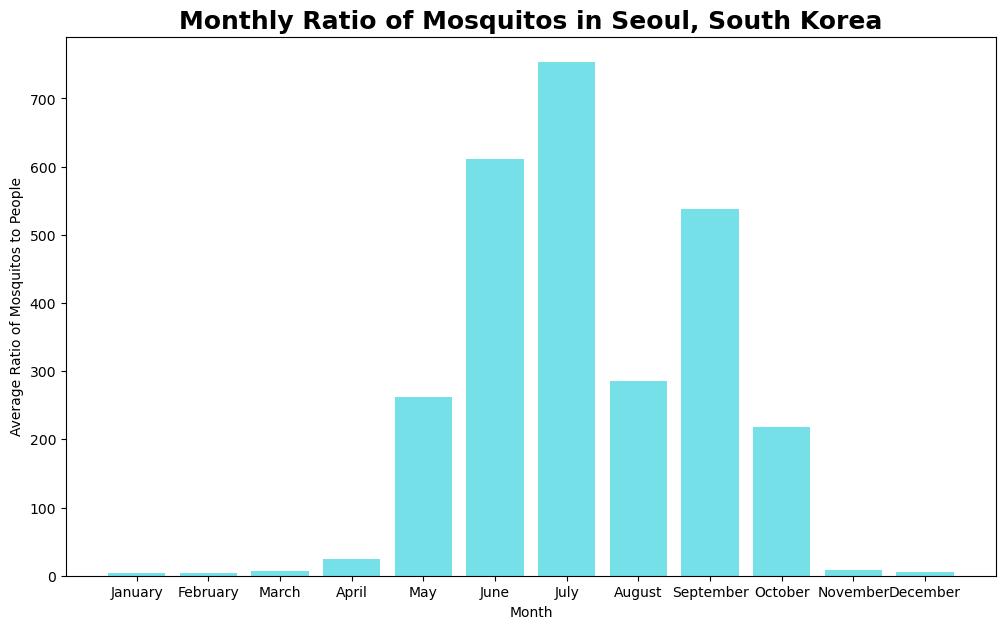

In [250]:
plt.figure(figsize=(12,7))
months_to_look = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
values = []

for month in months_to_look:
    month = df.loc[(df['Month'] == month)]
    values.append(month.loc[:, "mosquito_Indicator"].mean())

plt.bar(months_to_look, values, align='center', color = '#76e0e8',)

plt.title("Monthly Ratio of Mosquitos in Seoul, South Korea", fontdict={'fontweight':'bold','fontsize':18})
plt.xlabel('Month')
plt.ylabel('Average Ratio of Mosquitos to People')

plt.show()

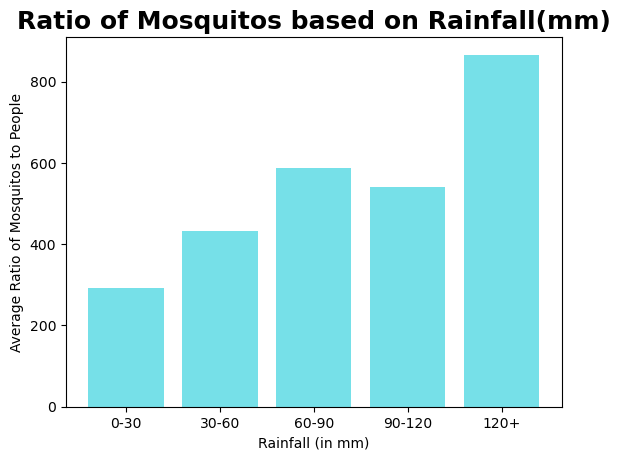

In [268]:

very_light_rainfall = df.loc[(df['rain(mm)'] > 0) & (df['rain(mm)'] <= 30)]
light_rainfall = df.loc[(df['rain(mm)'] > 30) & (df['rain(mm)'] <= 60)]
medium_rainfall = df.loc[(df['rain(mm)'] > 60) & (df['rain(mm)'] <= 90)]
heavy_rainfall = df.loc[(df['rain(mm)'] > 90) & (df['rain(mm)'] <= 120)]
very_heavy_rainfall = df.loc[(df['rain(mm)'] > 120)]
                             
rainfalls = [very_light_rainfall, light_rainfall, medium_rainfall, heavy_rainfall, very_heavy_rainfall]
values = []
labels = ['0-30','30-60','60-90','90-120','120+']


for rainfall in rainfalls:
    values.append(rainfall.loc[:, "mosquito_Indicator"].mean())
                        
plt.bar(labels, values, align='center', color = '#76e0e8')
plt.title("Ratio of Mosquitos based on Rainfall(mm)", fontdict={'fontweight':'bold','fontsize':18})
plt.xlabel('Rainfall (in mm)')
plt.ylabel('Average Ratio of Mosquitos to People')

plt.show()

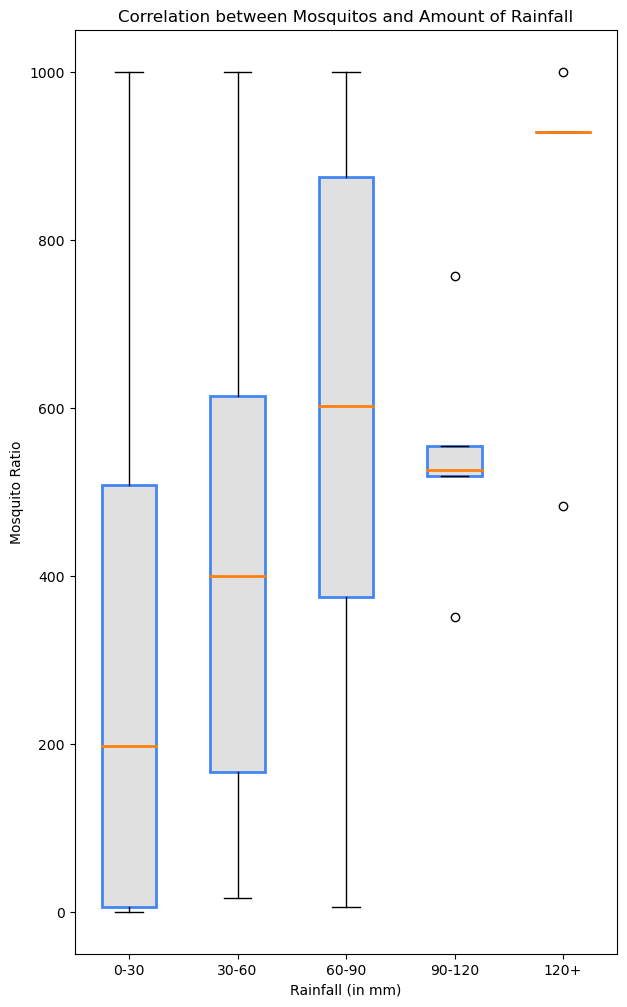

In [299]:
plt.figure(figsize=(7,12))

other_df = df

very_light = other_df.loc[(other_df['rain(mm)'] > 0) & (other_df['rain(mm)'] <= 30)]['mosquito_Indicator']
light = other_df.loc[(other_df['rain(mm)'] > 30) & (other_df['rain(mm)'] <= 60)]['mosquito_Indicator']
medium = other_df.loc[(other_df['rain(mm)'] > 60) & (other_df['rain(mm)'] <= 90)]['mosquito_Indicator']
heavy = other_df.loc[(other_df['rain(mm)'] > 90) & (other_df['rain(mm)'] <= 120)]['mosquito_Indicator']
very_heavy = other_df.loc[(other_df['rain(mm)'] > 120)]['mosquito_Indicator']

labels = ['0-30', '30-60', '60-90', '90-120', '120+']
 

boxes = plt.boxplot([very_light,light,medium,heavy,very_heavy], labels = labels, patch_artist=True, medianprops={'linewidth':2})

for box in boxes['boxes']:
    # Set edge color
    box.set(color='#4286f4', linewidth=2)
    
    # Change Fill Color
    box.set(facecolor='#e0e0e0')
    
plt.title("Correlation between Mosquitos and Amount of Rainfall")
plt.ylabel('Mosquito Ratio')
plt.xlabel('Rainfall (in mm)')

plt.show()

In [297]:
very_light = other_df.loc[(other_df['rain(mm)'] > 0) & (other_df['rain(mm)'] <= 30)]
light = other_df.loc[(other_df['rain(mm)'] > 30) & (other_df['rain(mm)'] <= 60)]
medium = other_df.loc[(other_df['rain(mm)'] > 60) & (other_df['rain(mm)'] <= 90)]
heavy = other_df.loc[(other_df['rain(mm)'] > 90) & (other_df['rain(mm)'] <= 120)]
very_heavy = other_df.loc[(other_df['rain(mm)'] > 120)]

heavy

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃),Month
61,2016-07-01,518.3,108.5,24.0,22.0,26.6,July
65,2016-07-05,525.7,100.5,23.1,20.2,24.8,July
429,2017-07-02,756.3,92.0,24.3,21.9,26.8,July
479,2017-08-15,554.9,93.5,21.9,20.8,24.0,August
886,2018-08-28,351.4,96.5,23.7,22.5,26.1,August
